In [55]:
import pandas as pd
import geopandas as gpd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
city = 'Luanda'

In [24]:
data_folder = Path(r"D:\World Bank\CRP\data\Water pollution")
output_folder = Path('output')

In [17]:
# set data files
oid_csv = pd.read_excel(data_folder / "OBJECTID_data_gridcell_match.xlsx")
ec_csv = pd.read_csv(data_folder / 'ec_preds_05_22_19.csv')
noxn_csv = pd.read_csv(data_folder / 'noxn_preds_05_16_19.csv')
bod_csv = pd.read_csv(data_folder / 'bod_preds_04_02_19.csv')

In [3]:
# get the centroid of the catchment in order to determine the appropriate data source
centroid = gpd.read_file('AOI/luanda_catchment_level4.shp').to_crs(epsg = 4326).centroid

C:\Users\Owner\AppData\Local\Temp\ipykernel_9184\3510852079.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gpd.read_file('AOI/luanda_catchment_level4.shp').to_crs(epsg = 4326).centroid


In [11]:
def find_nearest_coord(centroid):
    nearest_oid = 0
    nearest_dist = 1e6
    
    for index, row in oid_csv.iterrows():
        dist = (centroid.x[0] - row['Lon']) ** 2 + (centroid.y[0] - row['Lat']) ** 2
        if dist < nearest_dist:
            nearest_dist = dist
            nearest_oid = row['OBJECTID']
    
    return nearest_oid

In [13]:
oid = find_nearest_coord(centroid)

In [42]:
ec = ec_csv[ec_csv['OBJECTID'] == oid][['year', 'month', 'preds']].reset_index(drop = True)
noxn = noxn_csv[noxn_csv['OBJECTID'] == oid][['year', 'month', 'preds']].reset_index(drop = True)
bod = bod_csv[bod_csv['OBJECTID'] == oid][['year', 'month', 'preds']].reset_index(drop = True)

In [43]:
ec.to_csv(output_folder / f'{city.lower()}_electrical_conductivity.csv')
noxn.to_csv(output_folder / f'{city.lower()}_nitrate_nitrite.csv')
bod.to_csv(output_folder / f'{city.lower()}_biological_oxygen_demand.csv')

In [51]:
ec['day'] = 1
ec['time'] = pd.to_datetime(ec[['year', 'month', 'day']])
noxn['day'] = 1
noxn['time'] = pd.to_datetime(noxn[['year', 'month', 'day']])
bod['day'] = 1
bod['time'] = pd.to_datetime(bod[['year', 'month', 'day']])

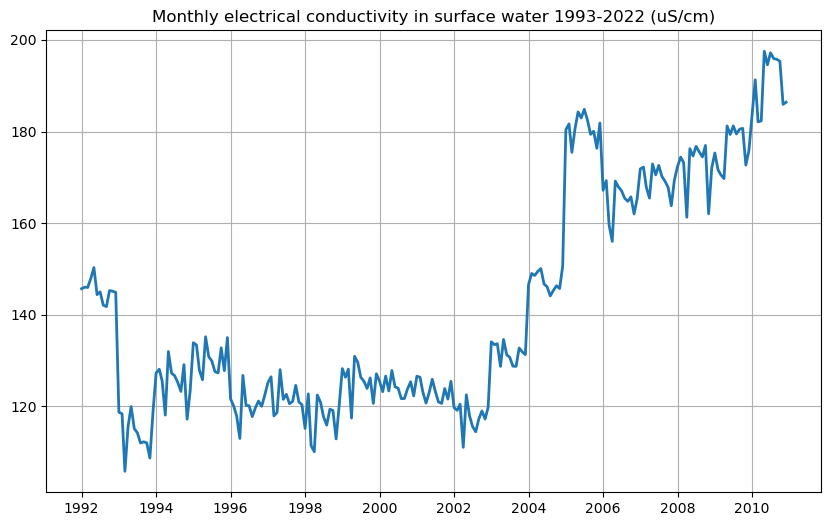

In [58]:
# plot

# Create the line chart using Seaborn with connected lines
plt.figure(figsize=(10, 6))

sns.lineplot(data=ec, x='time', y='preds', linewidth=2)

# Add labels and title
plt.xlabel('')
plt.ylabel('')
plt.title('Monthly electrical conductivity in surface water 1993-2022 (uS/cm)')

# plt.xticks(rotation=45)
plt.grid(True)
plt.show()

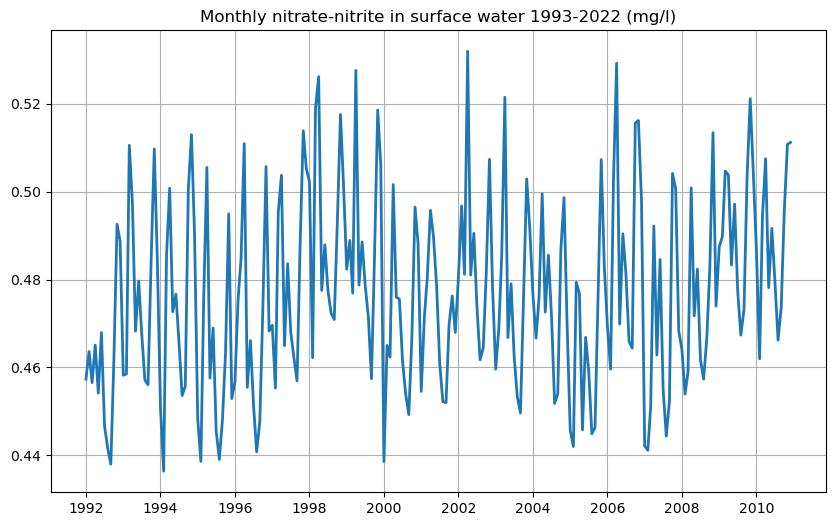

In [59]:
# plot

# Create the line chart using Seaborn with connected lines
plt.figure(figsize=(10, 6))

sns.lineplot(data=noxn, x='time', y='preds', linewidth=2)

# Add labels and title
plt.xlabel('')
plt.ylabel('')
plt.title('Monthly nitrate-nitrite in surface water 1993-2022 (mg/l)')

# plt.xticks(rotation=45)
plt.grid(True)
plt.show()

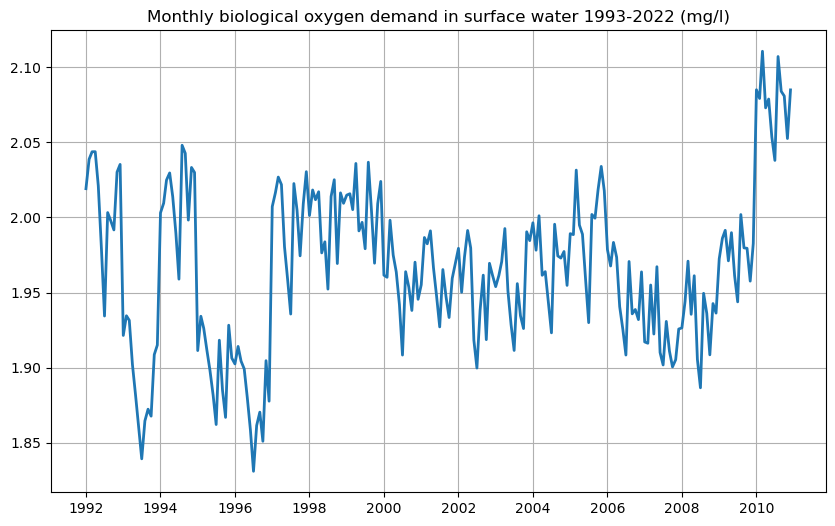

In [60]:
# plot

# Create the line chart using Seaborn with connected lines
plt.figure(figsize=(10, 6))

sns.lineplot(data=bod, x='time', y='preds', linewidth=2)

# Add labels and title
plt.xlabel('')
plt.ylabel('')
plt.title('Monthly biological oxygen demand in surface water 1993-2022 (mg/l)')

# plt.xticks(rotation=45)
plt.grid(True)
plt.show()